In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from scipy.optimize import curve_fit
import numpy as np

In [18]:
#Define a fucntion that we want to fit the data to
def func(x,y0,K,plateau):
    
    #plateau = 0
    return (y0 - plateau) * np.exp(-K * x) + plateau

# Non-Normalized Group Plots

In [16]:
def plotGroupAverages(func,directory,column='GroupAvgLogRT'):
    #list out the conditions
    plt.figure(figsize=(30,30))
    conditions = ['Sham','Anod','Cath','Vertex']
    os.chdir(directory)
    #find min and max
    maximum = 0
    minimum = 1e100
    for f in os.listdir():
        if(f.endswith('.csv')):
            df = pd.read_csv(f)
            if maximum < df[column].max():
                maximum = df[column].max()
            if minimum > df[column].min():
                minimum = df[column].min()
    for i,c in enumerate(conditions):
        for f in os.listdir():
            if (c in f):
                #then we want to make the plot
                df = pd.read_csv(f)
                x = np.arange(1,len(df[column].values)+1,1)
                y = df[column].to_numpy()
                #Fit the curve
                popt, pcov = curve_fit(func, x, y)

                print(popt)
                #create a trend line
                trendline = func(x,*popt)

                plt.yticks(np.arange(minimum,maximum,(maximum-minimum)/len(df[column].values)))
                plt.xticks(np.arange(1,len(df[column].values),3))
                plt.xlabel("Run")
                plt.ylabel(column)
                plt.subplot(2,2,i+1)
                if "control".lower() in f.lower():
                    plt.scatter(x,y,label="Control",color='blue')
                    plt.plot(x,trendline,'r--',label="Control Regression")
                else:
                    plt.scatter(x,y,label="Patient",color='red')
                    plt.plot(x,trendline,'r--',label="Patient Regression")
                
                plt.grid(True)
                plt.title(c)
                plt.legend()
    plt.savefig("{}_plot.png".format(column))
    

## Non-Normalized Plots

[2.67899441 0.01074734 1.98887917]
[2.78188803 0.02388713 2.55127994]
[2.66439133e+00 2.66293497e-03 2.25910528e-01]
[2.78716657 0.04400632 2.60901338]
[2.67559841 0.01955396 2.16987033]
[2.77893061 0.07385277 2.61476653]
[2.76517943 0.04154497 2.60900072]
[2.65823725 0.032033   2.39062485]


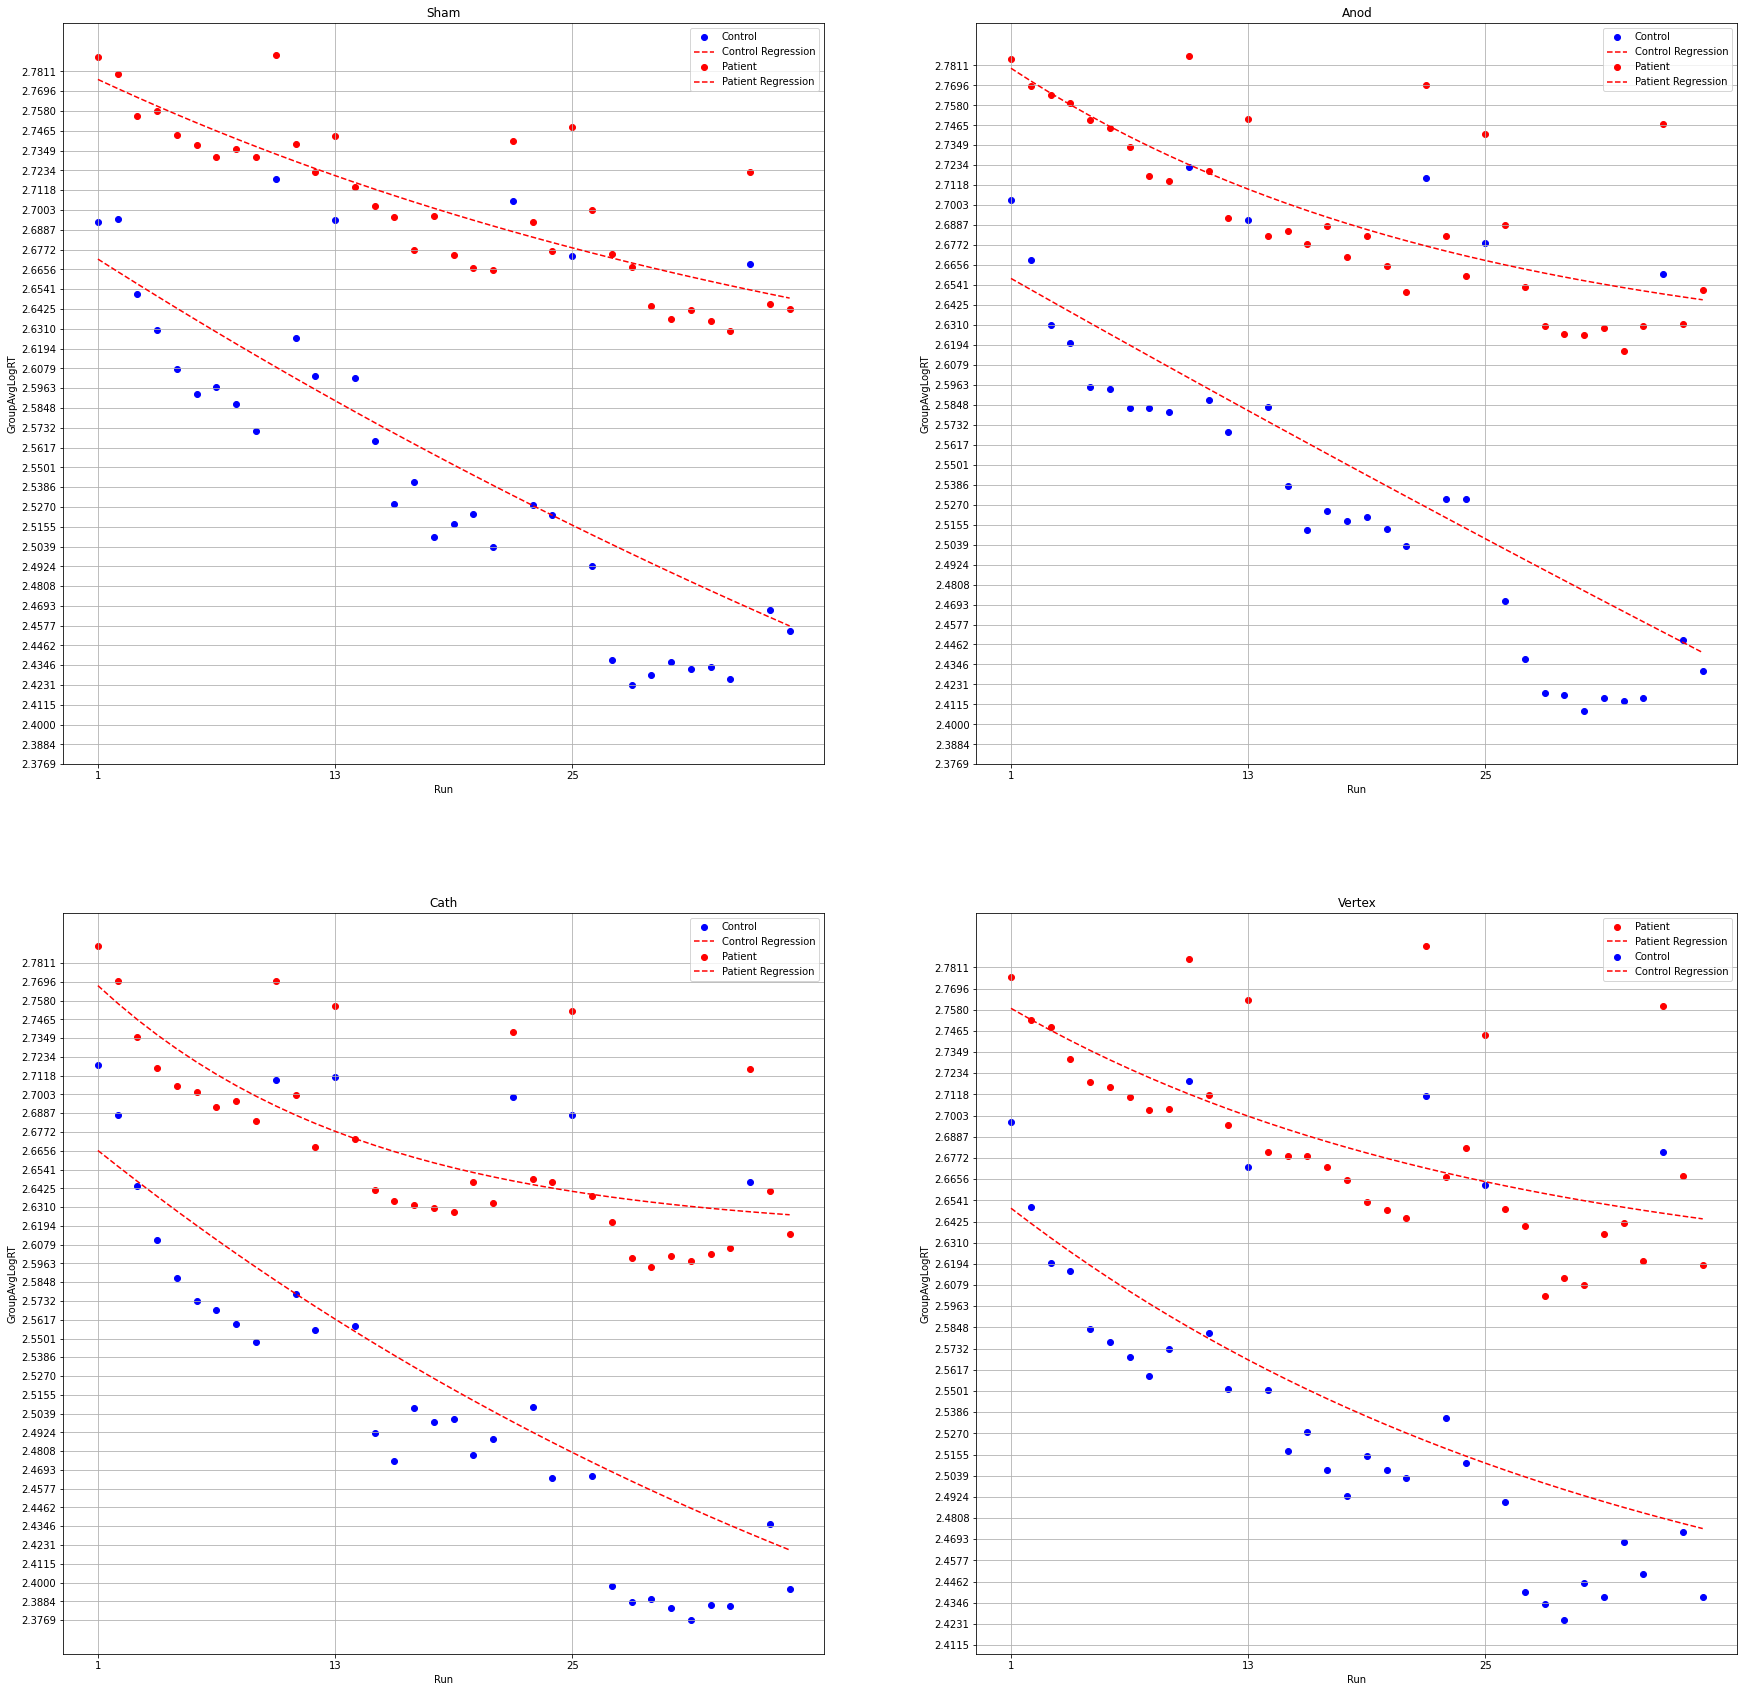

In [13]:

directory = "/Users/adish/Documents/NYPSI and NKI Research/TDCS-SRTT/data/WrangledData/SUBJECT_RUN/subjectRunAvgs/groupAverageLogRTs"

plotGroupAverages(func,directory)

## Normalized Plots



[ 0.06571413 -0.27277291]
[ 0.03739899 -0.14172006]
[ 0.08528469 -0.26220998]
[ 0.06822585 -0.1306195 ]
[ 0.10102428 -0.2784209 ]
[ 0.12797549 -0.12919934]
[ 0.12523837 -0.12362168]
[ 0.12855917 -0.22038827]


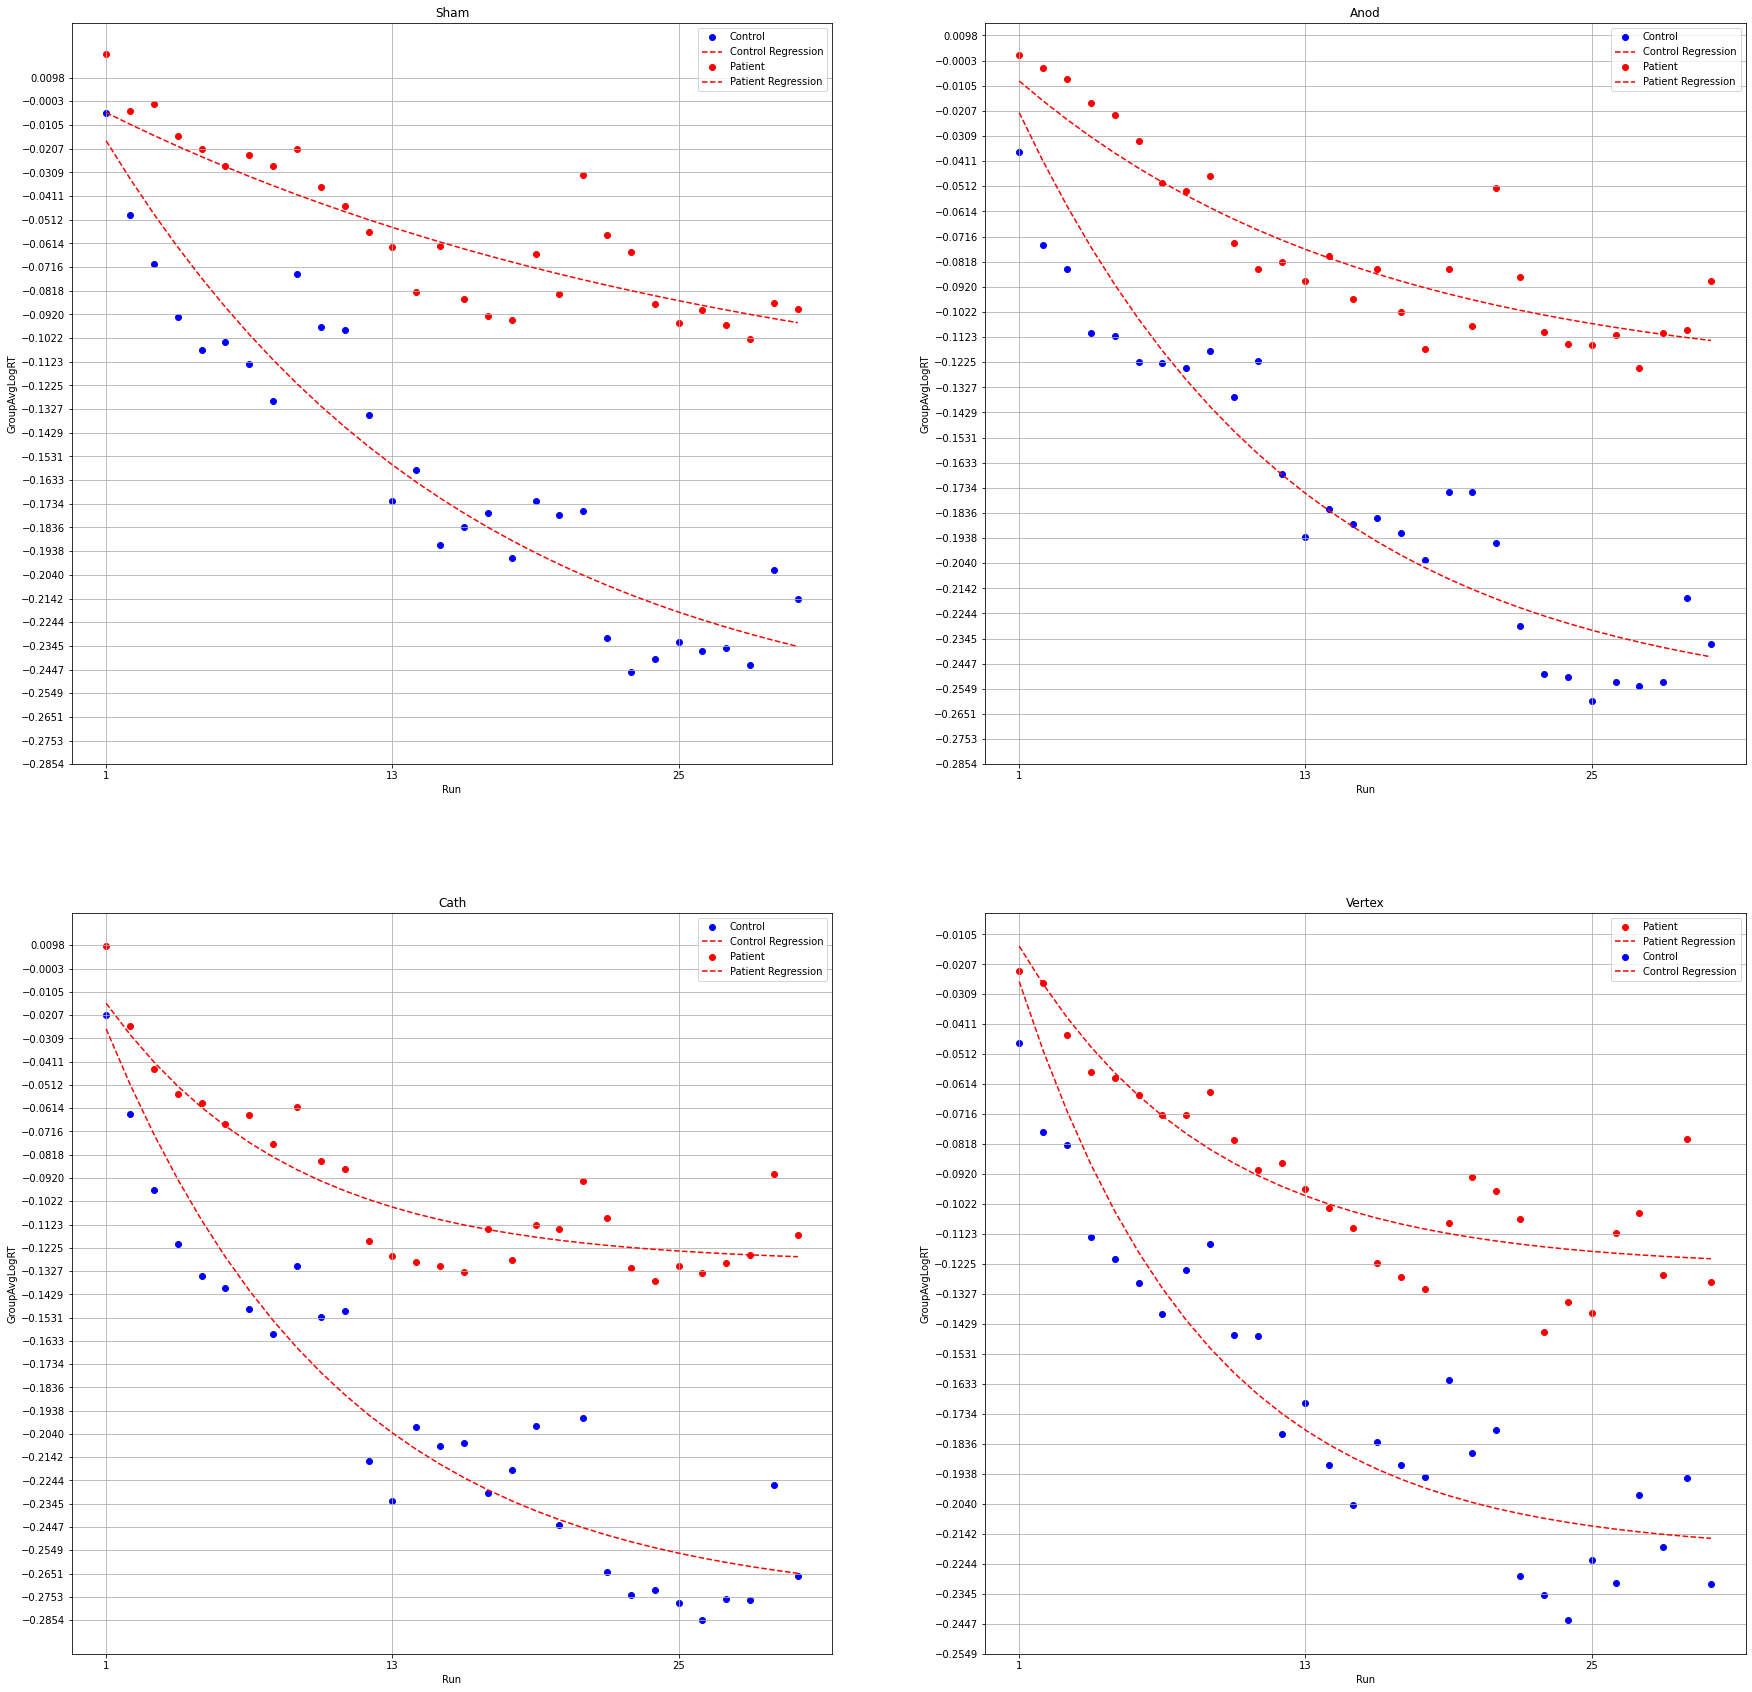

In [14]:
directory = "/Users/adish/Documents/NYPSI and NKI Research/TDCS-SRTT/data/NormalizedData/NormalizedWrangledData/SUBJECT_RUN/subjectRunAvgs/groupAverageLogRTs"
def normFunc(x,K,plateau):
    y0 = 0
    #plateau = 0
    return (y0 - plateau) * np.exp(-K * x) + plateau
plotGroupAverages(normFunc,directory)

## Percent Fast Group Average Plots on Normalized Data

<ipython-input-15-fe4400889452>:3: RuntimeWarning: invalid value encountered in log
  return plateau * np.log(k*x)
<ipython-input-15-fe4400889452>:3: RuntimeWarning: invalid value encountered in log
  return plateau * np.log(k*x)
<ipython-input-15-fe4400889452>:3: RuntimeWarning: invalid value encountered in log
  return plateau * np.log(k*x)
<ipython-input-15-fe4400889452>:3: RuntimeWarning: invalid value encountered in log
  return plateau * np.log(k*x)
<ipython-input-15-fe4400889452>:3: RuntimeWarning: invalid value encountered in log
  return plateau * np.log(k*x)


[4.34586373 0.78574752]
[12.93364555  0.58211179]
[6.72689855 0.50468018]
[14.37507293  0.61307962]
[16.43951919  0.63369456]
[5.90155    1.21871668]


<ipython-input-15-fe4400889452>:3: RuntimeWarning: invalid value encountered in log
  return plateau * np.log(k*x)


[6.9921791  0.56097004]
[10.97707521  0.98505875]


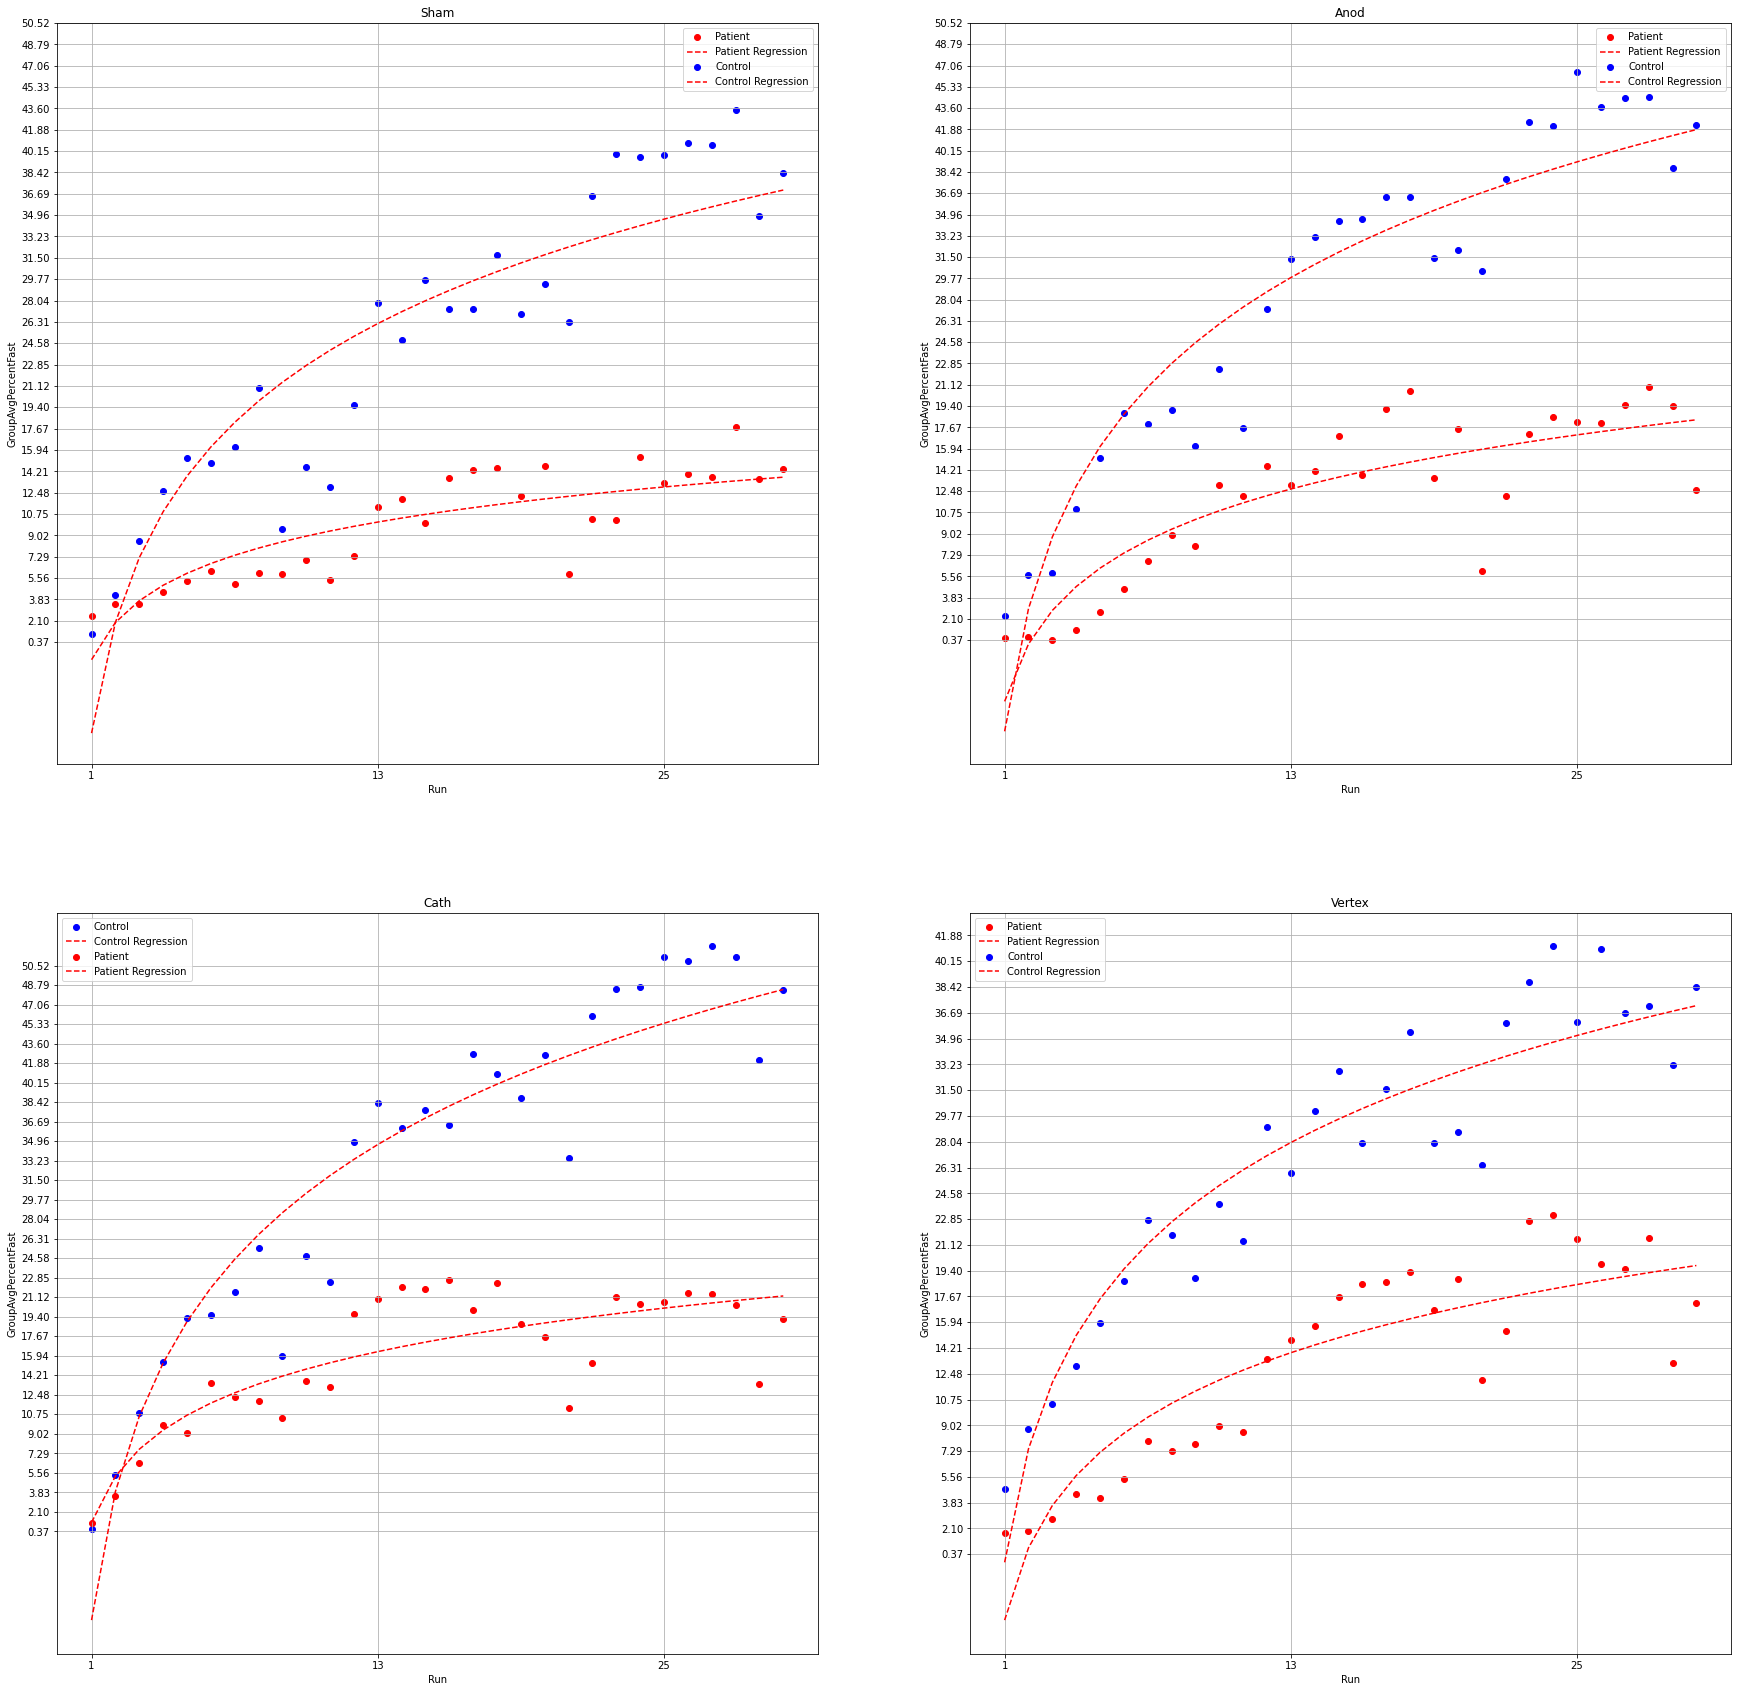

In [15]:
directory = "/Users/adish/Documents/NYPSI and NKI Research/TDCS-SRTT/data/NormalizedData/NormalizedWrangledData/SUBJECT_RUN/subjectRunAvgs/groupAverageLogRTs/PercentFastGroupAverages"
def percentFastFunc(x,plateau,k):
    return plateau * np.log(k*x)
plotGroupAverages(percentFastFunc,directory,column='GroupAvgPercentFast')